# rf601_intminuit

'LIKELIHOOD AND MINIMIZATION' RooFit tutorial macro #601

Interactive minimization with MINUIT




**Author:**  Clemens Lange, Wouter Verkerke (C version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:19 AM.</small></i>

In [1]:
import ROOT

Setup pdf and likelihood
-----------------------------------------------

Observable

In [2]:
x = ROOT.RooRealVar("x", "x", -20, 20)

Model (intentional strong correlations)

In [3]:
mean = ROOT.RooRealVar("mean", "mean of g1 and g2", 0)
sigma_g1 = ROOT.RooRealVar("sigma_g1", "width of g1", 3)
g1 = ROOT.RooGaussian("g1", "g1", x, mean, sigma_g1)

sigma_g2 = ROOT.RooRealVar("sigma_g2", "width of g2", 4, 3.0, 6.0)
g2 = ROOT.RooGaussian("g2", "g2", x, mean, sigma_g2)

frac = ROOT.RooRealVar("frac", "frac", 0.5, 0.0, 1.0)
model = ROOT.RooAddPdf("model", "model", [g1, g2], [frac])

[#0] WARNING:InputArguments -- The parameter 'sigma_g1' with range [-inf, inf] of the RooGaussian 'g1' exceeds the safe range of (0, inf). Advise to limit its range.


Generate 1000 events

In [4]:
data = model.generate({x}, 1000)

Construct unbinned likelihood of model w.r.t. data

In [5]:
nll = model.createNLL(data)

[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2


Interactive minimization, error analysis
-------------------------------------------------------------------------------

Create MINUIT interface object

In [6]:
m = ROOT.RooMinimizer(nll)

[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_modelData) Summation contains a RooNLLVar, using its error level


Activate verbose logging of MINUIT parameter space stepping

In [7]:
m.setVerbose(True)

Call MIGRAD to minimize the likelihood

In [8]:
m.migrad()

0

[#0] WARNING:Minimization -- RooAbsMinimizerFcn::synchronize: WARNING: no initial error estimate available for frac: using 0.1
[#0] WARNING:Minimization -- RooAbsMinimizerFcn::synchronize: WARNING: no initial error estimate available for sigma_g2: using 0.3
Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1

prevFCN = 2660.220684  frac=0.5036, 
prevFCN = 2660.181264  frac=0.4964, 
prevFCN = 2660.261875  frac=0.5, sigma_g2=4.011, 
prevFCN = 2660.278974  sigma_g2=3.989, 
prevFCN = 2660.167705  sigma_g2=4.005, 
prevFCN = 2660.248509  sigma_g2=3.995, 
prevFCN = 2660.194127  frac=0.5812, sigma_g2=3.889, 
prevFCN = 2660.146969  frac=0.5429, sigma_g2=3.941, 
prevFCN = 2659.83839  frac=0.5459, 
prevFCN = 2659.836693  frac=0.5398, 
prevFCN = 2659.841351  frac=0.5429, sigma_g2=3.946, 
prevFCN = 2659.835035  sigma_g2=3.936, 
prevFCN = 2659.842919  frac=0.5497, sigma_g2=3.955, 
prevFCN = 2659.823248  frac=0.5767, sigma_g2=4.011, 
prevFCN = 2659.774616  frac=0.6314, s

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       2660.220684 Edm =      0.7499658139 NCalls =      7
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 2660.220684
  Edm           : 0.7499658139
  Internal parameters:	[                0    -0.3398369095]	
  Internal gradient  :	[      -5.61967122      7.285345928]	
  Internal covariance matrix:
[[    0.058086658              0]
 [              0    0.021957944]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1000
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       2660.220684 Edm =      0.7499658139 NCalls =      7
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =        2659.83839 Edm =    0.008262338757 NCalls =     13
Info in <Minuit2>: VariableMetricBuilder    2 - FCN =       2659.738319 Edm =   0.0004391718851 NCalls =     21
Info in <Minuit2>: VariableMet

Print values of all parameters, reflect values (and error estimates)
that are back propagated from MINUIT

In [9]:
model.getParameters({x}).Print("s")

  1) RooRealVar::     frac = 0.6236 +/- 0.164
  2) RooRealVar::     mean = 0
  3) RooRealVar:: sigma_g1 = 3
  4) RooRealVar:: sigma_g2 = 4.115 +/- 0.405


Disable verbose logging

In [10]:
m.setVerbose(False)

Run HESSE to calculate errors from d2L/dp2

In [11]:
m.hesse()

0

Info in <Minuit2>: Minuit2Minimizer::Hesse Using max-calls 1000
Info in <Minuit2>: Minuit2Minimizer::Hesse Hesse is valid - matrix is accurate


Print value (and error) of sigma_g2 parameter, reflects
value and error back propagated from MINUIT

In [12]:
sigma_g2.Print()

RooRealVar::sigma_g2 = 4.115 +/- 0.4057  L(3 - 6) 


Run MINOS on sigma_g2 parameter only

In [13]:
m.minos({sigma_g2})

0

******************************************************************************************************
Minuit2Minimizer::GetMinosError - Run MINOS LOWER error for parameter #1 : sigma_g2 using max-calls 1000, tolerance 1
******************************************************************************************************
Minuit2Minimizer::GetMinosError - Run MINOS UPPER error for parameter #1 : sigma_g2 using max-calls 1000, tolerance 1
Minos: Lower error for parameter sigma_g2  :  -0.3794
Minos: Upper error for parameter sigma_g2  :  0.4574


Info in <Minuit2>: MnMinos Determination of lower Minos error for parameter 1
Info in <Minuit2>: MnFunctionCross Run Migrad with fixed parameters:
  Pos 1: sigma_g2 = 3.70891
Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =        2660.55118 Edm =       0.113308465 NCalls =      3
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 2660.55118
  Edm           : 0.113308465
  Internal parameters:	[   -0.06226626228]	
  Internal gradient  :	[      3.194420786]	
  Internal covariance matrix:
[[    0.044415863]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.0005 with call limit = 1000
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =        2660.55118 Edm =       0.113308465 NCalls =      3
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       2660.315058 Edm =   0.0002150022484 NCalls =      7
Info in <Minuit2>: MnFunctionCross Result after Mig

Print value (and error) of sigma_g2 parameter, reflects
value and error back propagated from MINUIT

In [14]:
sigma_g2.Print()

RooRealVar::sigma_g2 = 4.115 +/- (-0.3794,0.4574)  L(3 - 6) 


Saving results, contour plots
---------------------------------------------------------

Save a snapshot of the fit result. ROOT.This object contains the initial
fit parameters, final fit parameters, complete correlation
matrix, EDM, minimized FCN , last MINUIT status code and
the number of times the ROOT.RooFit function object has indicated evaluation
problems (e.g. zero probabilities during likelihood evaluation)

In [15]:
r = m.save()

Make contour plot of mx vs sx at 1,2, sigma

In [16]:
frame = m.contour(frac, sigma_g2, 1, 2, 3)
frame.SetTitle("Contour plot")

Info in <Minuit2>: Minuit2Minimizer::Contour Computing contours - 0.5
Info in <Minuit2>: Minuit2Minimizer::Contour Computing contours - 2
Info in <Minuit2>: Minuit2Minimizer::Contour Computing contours - 4.5


Print the fit result snapshot

In [17]:
r.Print("v")


  RooFitResult: minimized FCN value: 2660, estimated distance to minimum: 2.409e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MIGRAD=0 HESSE=0 MINOS=0 

    Constant Parameter    Value     
  --------------------  ------------
                  mean    0.0000e+00
              sigma_g1    3.0000e+00

    Floating Parameter  InitialValue    FinalValue (+HiError,-LoError)    GblCorr.
  --------------------  ------------  ----------------------------------  --------
                  frac    5.0000e-01    6.2360e-01         +/-  1.64e-01  <none>
              sigma_g2    4.0000e+00    4.1146e+00 (+4.57e-01,-3.79e-01)  <none>



Change parameter values, plotting
-----------------------------------------------------------------

At any moment you can manually change the value of a (constant)
parameter

In [18]:
mean.setVal(0.3)

Rerun MIGRAD,HESSE

In [19]:
m.migrad()
m.hesse()
frac.Print()

Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 2663.35774508719987
Edm   = 9.56369873007578491e-05
Nfcn  = 38
frac	  = 0.5655	 +/-  0.1961	(limited)
sigma_g2	  = 4.005	 +/-  0.3917	(limited)
RooRealVar::frac = 0.5655 +/- 0.1961  L(0 - 1) 


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       2663.411598 Edm =      0.0145493914 NCalls =      9
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 2663.411598
  Edm           : 0.0145493914
  Internal parameters:	[     0.2497912427    -0.2598610789]	
  Internal gradient  :	[      1.120322622    -0.2622810121]	
  Internal covariance matrix:
[[    0.044738711              0]
 [              0    0.029727437]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1000
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       2663.411598 Edm =      0.0145493914 NCalls =      9
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       2663.400666 Edm =    0.005796742296 NCalls =     15
Info in <Minuit2>: VariableMetricBuilder    2 - FCN =        2663.35958 Edm =     0.00172901389 NCalls =     22
Info in <Minuit2>: VariableMet

Now fix sigma_g2

In [20]:
sigma_g2.setConstant(True)

Rerun MIGRAD,HESSE

In [21]:
m.migrad()
m.hesse()
frac.Print()

c = ROOT.TCanvas("rf601_intminuit", "rf601_intminuit", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()

c.SaveAs("rf601_intminuit.png")

Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 2663.35774092453448
Edm   = 1.35713798793672428e-10
Nfcn  = 15
frac	  = 0.5652	 +/-  0.08029	(limited)
sigma_g2	  = 4.005	 (fixed)
RooRealVar::frac = 0.5652 +/- 0.08029  L(0 - 1) 


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       2663.357745 Edm =   4.211167051e-06 NCalls =      5
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 2663.357745
  Edm           : 4.211167051e-06
  Internal parameters:	[     0.1313437863]	
  Internal gradient  :	[    0.01784069115]	
  Internal covariance matrix:
[[    0.052922349]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1000
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       2663.357745 Edm =   4.211167051e-06 NCalls =      5
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       2663.357741 Edm =   6.315677937e-14 NCalls =      8
Info in <Minuit2>: VariableMetricBuilder After Hessian
Info in <Minuit2>: VariableMetricBuilder    2 - FCN =       2663.357741 Edm =   1.357137988e-10 NCalls =     15
Info in <Minuit2>: Minuit2Minimizer::Hesse Using max-ca

Draw all canvases 

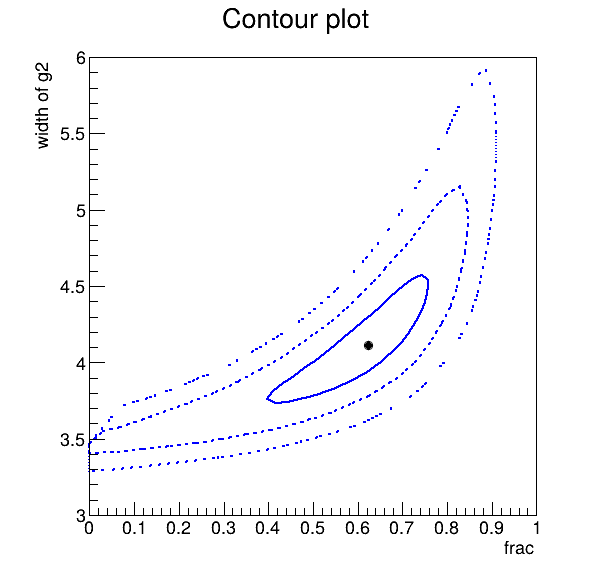

In [22]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()